<a href="https://colab.research.google.com/github/ASHISHKUMAR2411/DL-Simplified/blob/main/Age%26SexDetection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = "drive/MyDrive/ColabNote/UTKFace"

In [ ]:
import os
files=os.listdir(path)

In [ ]:
import cv2
ages=[]
genders=[]
images=[]

for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  total=path+'/'+fle
  print(total)
  image=cv2.imread(total)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(48,48))
  images.append(image)

Streaming output truncated to the last 5000 lines.
drive/MyDrive/ColabNote/UTKFace/25_1_0_20170117145120563.jpg.chip.jpg
drive/MyDrive/ColabNote/UTKFace/26_0_0_20170113210126348.jpg.chip.jpg
drive/MyDrive/ColabNote/UTKFace/26_0_0_20170113134718713.jpg.chip.jpg
drive/MyDrive/ColabNote/UTKFace/25_1_3_20170119172104288.jpg.chip.jpg
drive/MyDrive/ColabNote/UTKFace/25_1_0_20170117134947430.jpg.chip.jpg
drive/MyDrive/ColabNote/UTKFace/25_1_4_20170103230205288.jpg.chip.jpg
drive/MyDrive/ColabNote/UTKFace/25_1_1_20161220222224947.jpg.chip.jpg
drive/MyDrive/ColabNote/UTKFace/25_1_0_20170103175619551.jpg.chip.jpg
drive/MyDrive/ColabNote/UTKFace/26_0_0_20170113210127395.jpg.chip.jpg
drive/MyDrive/ColabNote/UTKFace/25_1_0_20170104022204452.jpg.chip.jpg
drive/MyDrive/ColabNote/UTKFace/25_0_3_20170119171616945.jpg.chip.jpg
drive/MyDrive/ColabNote/UTKFace/25_1_0_20170103182309849.jpg.chip.jpg
drive/MyDrive/ColabNote/UTKFace/25_0_3_20170119171339224.jpg.chip.jpg
drive/MyDrive/ColabNote/UTKFace/25_1_0_

In [ ]:
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

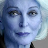

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(images[24])

In [ ]:
print(ages[24])
print(genders[24])

80
1


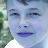

In [ ]:
cv2_imshow(images[53])

In [ ]:
print(ages[53])
print(genders[53])

9
0


In [ ]:
import numpy as np
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

In [ ]:
np.save(path+'image.npy',images_f)
np.save(path+'gender.npy',genders_f)
np.save(path+'age.npy',ages_f)

In [ ]:
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


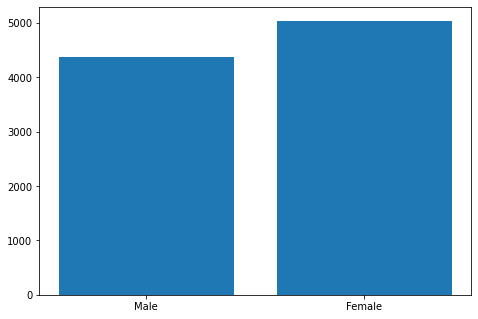

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[4372,5047]
ax.bar(gender,values)
plt.show()

In [ ]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


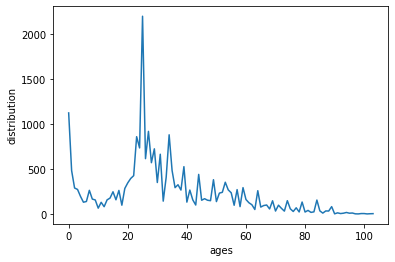

In [ ]:
val=values.tolist()
cnt=counts.tolist()
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [ ]:
labels=[]

i=0
while i<len(ages):
  label=[]
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i+=1

In [ ]:
images_f_2=images_f/255
labels_f=np.array(labels)
images_f_2.shape

(23708, 48, 48, 3)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.25)
Y_train[0:5]

array([[[37],
        [ 1]],

       [[ 3],
        [ 1]],

       [[65],
        [ 0]],

       [[ 2],
        [ 0]],

       [[40],
        [ 1]]])

In [ ]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [ ]:
Y_train_2[0][0:5]

array([[1],
       [1],
       [0],
       [0],
       [1]])

In [ ]:
Y_train_2[1][0:5]

array([[37],
       [ 3],
       [65],
       [ 2],
       [40]])

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(64,activation='relu')(flatten)
  dense_2= Dense(64,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)
  output_2= Dense(1,activation="relu",name='age_out')(drop_2)
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",
	metrics=["accuracy"])
  
  return model

In [ ]:
Model=model((48,48,3))
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   896         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['dropout[0][0]']                
                                                                                              

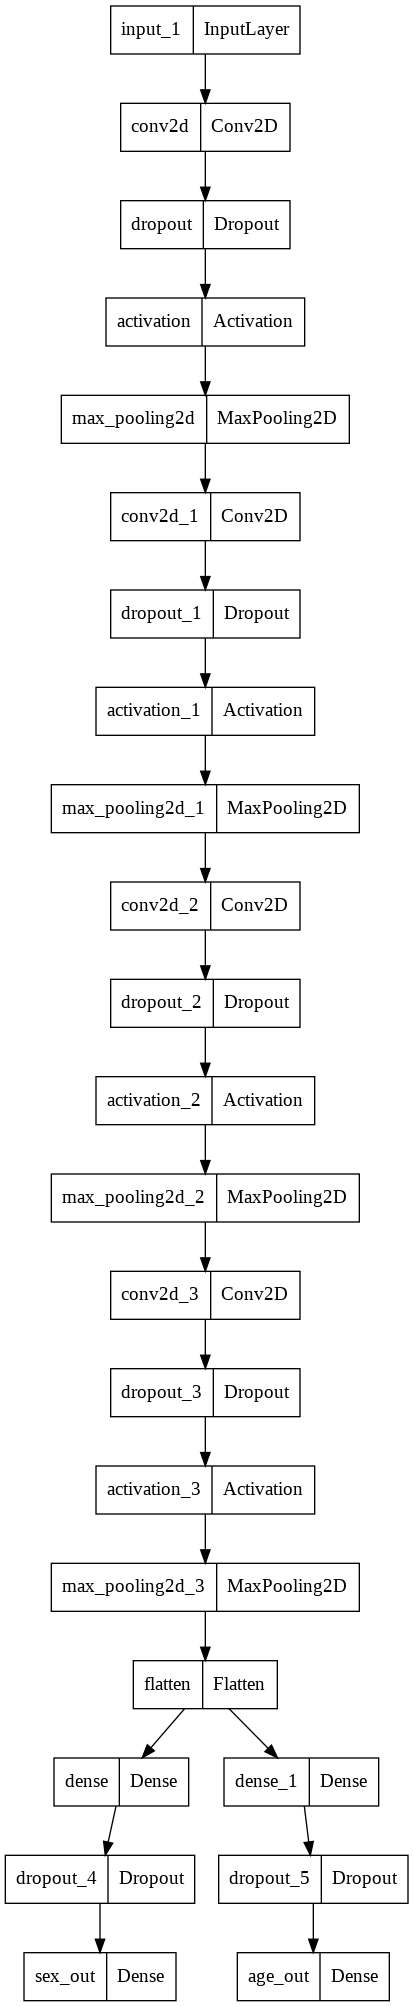

In [ ]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(Model)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
fle_s='Age_sex_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [48]:
# EPOS can be 500 for more accuracy 
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=10,callbacks=[callback_list])

Epoch 1/10
278/278 [==============================] - ETA: 0s - loss: 6.4742 - sex_out_loss: 0.2438 - age_out_loss: 5.4865 - sex_out_accuracy: 0.8988 - age_out_accuracy: 0.0480
Epoch 1: val_loss did not improve from 7.79287
278/278 [==============================] - 196s 703ms/step - loss: 6.4742 - sex_out_loss: 0.2438 - age_out_loss: 5.4865 - sex_out_accuracy: 0.8988 - age_out_accuracy: 0.0480 - val_loss: 9.0007 - val_sex_out_loss: 0.2627 - val_age_out_loss: 7.9893 - val_sex_out_accuracy: 0.8827 - val_age_out_accuracy: 0.0456
Epoch 2/10
278/278 [==============================] - ETA: 0s - loss: 6.4671 - sex_out_loss: 0.2416 - age_out_loss: 5.4703 - sex_out_accuracy: 0.9007 - age_out_accuracy: 0.0480
Epoch 2: val_loss did not improve from 7.79287
278/278 [==============================] - 180s 649ms/step - loss: 6.4671 - sex_out_loss: 0.2416 - age_out_loss: 5.4703 - sex_out_accuracy: 0.9007 - age_out_accuracy: 0.0480 - val_loss: 7.9965 - val_sex_out_loss: 0.2643 - val_age_out_loss: 6.9

In [49]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 12s 62ms/step - loss: 8.6091 - sex_out_loss: 0.2539 - age_out_loss: 7.5258 - sex_out_accuracy: 0.8895 - age_out_accuracy: 0.0456


[8.609078407287598,
 0.25392696261405945,
 7.525836944580078,
 0.8894887566566467,
 0.04555424302816391]

In [50]:
pred=Model.predict(X_test)

In [51]:
pred[1]

array([[29.498491],
       [45.978138],
       [30.340355],
       ...,
       [20.038057],
       [44.89763 ],
       [50.293648]], dtype=float32)

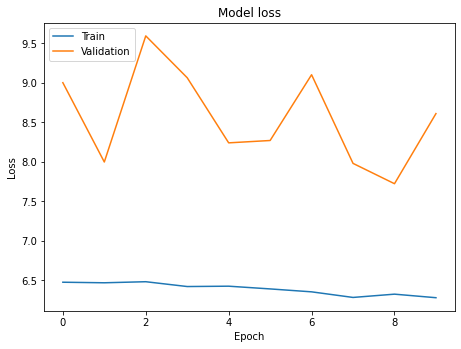

In [52]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

## For Gender

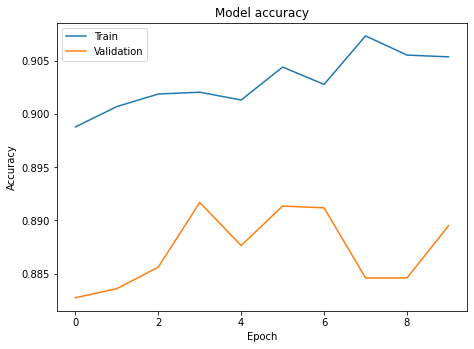

In [53]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

## For Age

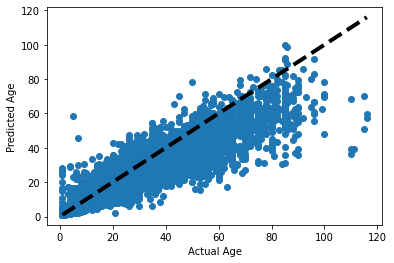

In [54]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [55]:
i=0
Pred_l=[]
while(i<len(pred[0])):

  Pred_l.append(int(np.round(pred[0][i])))
  i+=1

In [56]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report

In [57]:
report=classification_report(Y_test_2[0], Pred_l)

In [58]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      3073
           1       0.89      0.88      0.88      2854

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



In [59]:
results = confusion_matrix(Y_test_2[0], Pred_l)

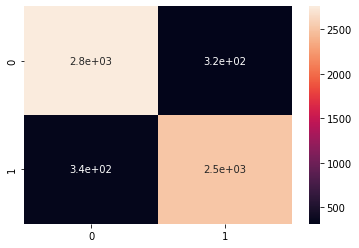

In [60]:
import seaborn as sns

sns.heatmap(results, annot=True)

In [61]:
def test_image(ind,images_f,images_f_2,Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  sex_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  sex=int(np.round(pred_1[0][0]))
  print("Predicted Age: "+ str(age))
  print("Predicted Sex: "+ sex_f[sex])

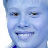

Predicted Age: 6
Predicted Sex: Male


In [62]:
test_image(57,images_f,images_f_2,Model)

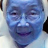

Predicted Age: 75
Predicted Sex: Female


In [63]:
test_image(137,images_f,images_f_2,Model)

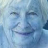

Predicted Age: 81
Predicted Sex: Female


In [64]:
test_image(502,images_f,images_f_2,Model)

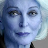

Predicted Age: 50
Predicted Sex: Female


In [65]:
test_image(24,images_f,images_f_2,Model)